In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from alpaca_trade_api.rest import REST, TimeFrame
import os

## 1. API Configuration

In [16]:
## NOTE: REMOVE THESE
API_KEY     = 'PKM0Z2W4X6W95E2VXIIA'
SECRET_KEY  = 'BgcSUzydM6tH6VDbkJdAmCp5ng1bSMQtdbjMVS6N'


In [17]:
# Instantiate the REST API client
# I use the paper trading URL for market data access, which is the standard
api = REST(key_id=API_KEY, secret_key=SECRET_KEY, base_url='https://paper-api.alpaca.markets')

print("--- Successfully Connected to Alpaca API ---")

--- Successfully Connected to Alpaca API ---


## 2. Procuring the Data

In [18]:
## Fetching Historical Crypto Data
print("--- Fetching Historical 1-Minute Bar Data for BTC/USD ---")
# Define parameters for our data request
symbol = "BTC/USD"
timeframe = TimeFrame.Minute # 1-minute bars
start_date = "2023-05-01"
end_date = "2023-05-31"

# Use the get_crypto_bars method
# This returns a pandas DataFrame directly
try:
    btc_bars = api.get_crypto_bars(
        symbol,
        timeframe,
        start=start_date,
        end=end_date
    ).df
    print(f"--- Successfully downloaded {len(btc_bars)} bars of data for {symbol} ---")
    print("\n")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please ensure your API keys are correct and have permissions.")
    # Stop execution if data download fails
    raise e

print('-'*50)
print('-'*50)

## Data Inspection and Processing
print("--- Inspecting the Downloaded Data ---")
print("Data shape:", btc_bars.shape)
print("\nFirst 5 rows:")
print(btc_bars.head())

print('-'*50)
print('-'*50)

# The DataFrame from Alpaca is already well-formatted.
# The index is a timezone-aware DatetimeIndex.
# Columns are: exchange, open, high, low, close, volume, trade_count, vwap
print("\nData Info:")
btc_bars.info()
print("\n")
# Run-time of approximately 5 +/- 3s

--- Fetching Historical 1-Minute Bar Data for BTC/USD ---
--- Successfully downloaded 43201 bars of data for BTC/USD ---


--------------------------------------------------
--------------------------------------------------
--- Inspecting the Downloaded Data ---
Data shape: (43201, 8)

First 5 rows:
                                  close         high           low  \
timestamp                                                            
2023-05-01 00:00:00+00:00  29286.999650  29290.19000  29222.080000   
2023-05-01 00:01:00+00:00  29292.210905  29326.33362  29282.474943   
2023-05-01 00:02:00+00:00  29255.232775  29298.44000  29243.000000   
2023-05-01 00:03:00+00:00  29290.061000  29294.24000  29243.220000   
2023-05-01 00:04:00+00:00  29320.109138  29327.48500  29288.145850   

                           trade_count      open    volume          vwap  \
timestamp                                                                  
2023-05-01 00:00:00+00:00          286  29260.73  19.62

## 3. Storing the data

In [22]:
local_file_path = f"data/btc_us_1min_bars_{start_date}_to_{end_date}.csv"
btc_bars.to_csv(local_file_path)
print(f"--- Data saved locally to '{local_file_path}' for future use ---")

--- Data saved locally to 'data/btc_us_1min_bars_2023-05-01_to_2023-05-31.csv' for future use ---


## 4. Data Visualization

### a. Plot the closing price

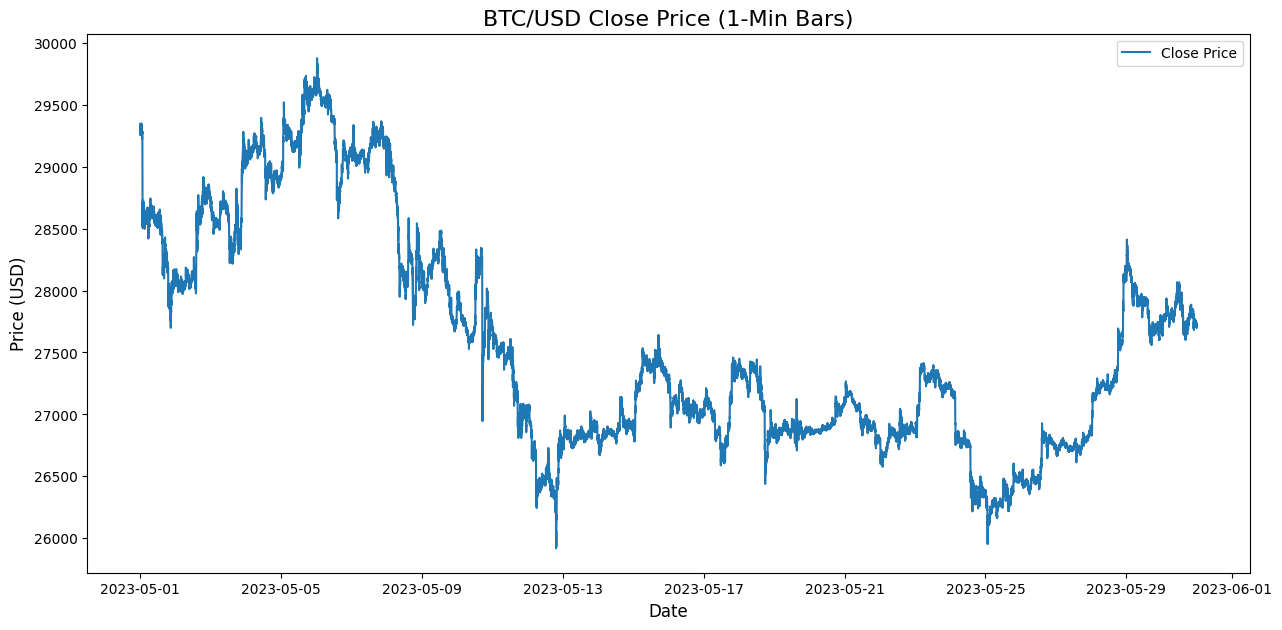

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(btc_bars.index, btc_bars['close'], label='Close Price')
plt.title(f'{symbol} Close Price (1-Min Bars)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.show()

### b. Plot the trading volume

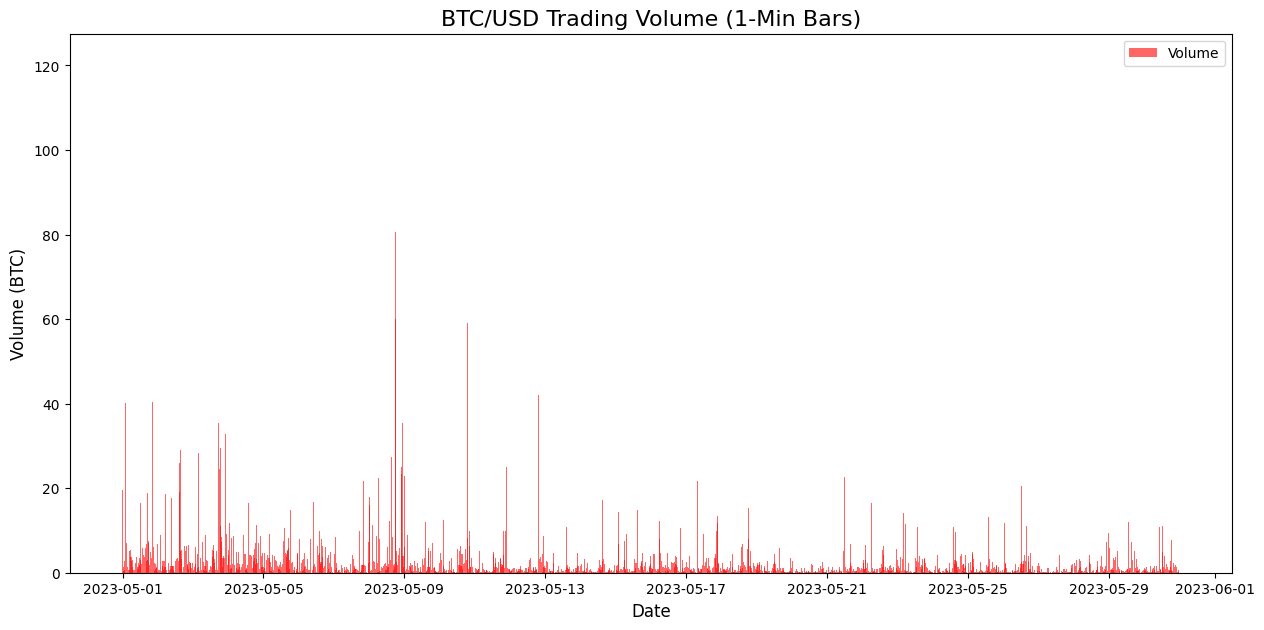

In [25]:
plt.figure(figsize=(15, 7))
plt.bar(btc_bars.index, btc_bars['volume'], color='red', alpha=0.6, width=0.001, label='Volume')
plt.title(f'{symbol} Trading Volume (1-Min Bars)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume (BTC)', fontsize=12)
plt.legend()
plt.show()